Project notebook


In [75]:

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json


In [76]:
csvpath_09_20_clean = os.path.join("..","Kelly", "crime_09_20_clean.csv")


In [77]:
crime_09_20_clean_df = pd.read_csv(csvpath_09_20_clean, encoding="utf-8", low_memory=False)
crime_09_20_clean_df

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,2308,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,2302,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,2303,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,2303,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,2303,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
364417,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,NaN,Harland Terrace,33.75377,-84.47405,2020,1
364418,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,NaN,Mechanicsville,33.73990,-84.40488,2020,1
364419,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,NaN,Inman Park,33.76553,-84.34934,2020,1
364420,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,NaN,Old Fourth Ward,33.76391,-84.37489,2020,1


In [78]:
#Sort by offense id
offense_sort = crime_09_20_clean_df.sort_values("offense_id", ascending = False)
# offense_sort

#Check for repeat offense id

crime_09_20_clean_df["offense_id"].nunique()



364109

In [79]:
#Count how many rows we have per year in original df to compare after duplicate drop
group_year = crime_09_20_clean_df.groupby(['occur_year']).count()
group_year

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,occur_month
occur_year,,,,,,,,,,
2009,39326,39326,39326,39326,39326,39323,38028,39326,39326,39326
2010,35529,35529,35529,35529,35529,35525,34259,35529,35529,35529
2011,34852,34852,34852,34852,34852,34725,33551,34852,34852,34852
2012,33382,33382,33382,33382,33382,33376,32105,33382,33382,33382
2013,32398,32398,32398,32397,32398,32393,31311,32398,32398,32398
2014,31115,31115,31115,31115,31115,31112,30038,31115,31115,31115
2015,30058,30058,30058,30057,30058,30054,28936,30058,30058,30058
2016,29006,29006,29006,29006,29006,29005,27857,29006,29006,29006
2017,26386,26386,26386,26386,26386,26385,25453,26386,26386,26386


In [81]:
#show info about duplicates
crime_09_20_clean_df.info(), duplicates.info()

#Get duplicates into a variable. Maybe unnecessary?
# duplicates = crime_09_20_clean_df[crime_09_20_clean_df.duplicated(subset=["offense_id", "occur_year","occur_time",
#                                                                           "UC2_Literal", "location"])] 
                                                                                                                                                  
#Pull a specific offense id and check where it's duplicated
offense_193621541 = crime_09_20_clean_df.loc[(crime_09_20_clean_df["offense_id"]==193621541)]
print(offense_193621541)


#Note duplicates may occur due to ibr_code. We are not using that column for our analysis, we should delete that column.
#Also sometimes duplicate IDs occur due to differing UC2_Literal entries. We want those!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364422 entries, 0 to 364421
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   offense_id    364422 non-null  int64  
 1   occur_date    364422 non-null  object 
 2   occur_time    364422 non-null  object 
 3   location      364420 non-null  object 
 4   UC2_Literal   364422 non-null  object 
 5   ibr_code      349562 non-null  object 
 6   neighborhood  351124 non-null  object 
 7   lat           364422 non-null  float64
 8   long          364422 non-null  float64
 9   occur_year    364422 non-null  int64  
 10  occur_month   364422 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 30.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 185 to 352534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   offense_id    174 non-null    int64  
 1   occur_date

In [87]:
#Drop the ibr_code column 
crime_no_ibr_df = crime_09_20_clean_df.drop("ibr_code", inplace = False, axis = 1)

#show info about duplicates
crime_no_ibr_df.info(), duplicates.info()

# #Put duplicates into a variable 
duplicates = crime_no_ibr_df[crime_no_ibr_df.duplicated(subset=["offense_id", "occur_year",
                                                                "occur_time", "UC2_Literal", "location"])]

#Duplicates are still 174 rows -  now delete them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364422 entries, 0 to 364421
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   offense_id    364422 non-null  int64  
 1   occur_date    364422 non-null  object 
 2   occur_time    364422 non-null  object 
 3   location      364420 non-null  object 
 4   UC2_Literal   364422 non-null  object 
 5   neighborhood  351124 non-null  object 
 6   lat           364422 non-null  float64
 7   long          364422 non-null  float64
 8   occur_year    364422 non-null  int64  
 9   occur_month   364422 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 27.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 185 to 352534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   offense_id    174 non-null    int64  
 1   occur_date    174 non-null    object 
 2   occur_time 

In [106]:
#Drop the duplicates
crime_no_ibr_df.drop_duplicates(["offense_id", "occur_year", "occur_time", "UC2_Literal", "location"], inplace = True)

#list of the duplicated offense
duplicate_list = duplicates.loc[:,"offense_id"].unique()
duplicate_list


array([193621541, 193522385, 193302001, 193051223, 192782336, 191901234,
       191841501, 191732212, 191652173, 191612131, 190800450, 183242277,
       182782034, 181951904, 181450624, 180490058, 173032162, 172872007,
       172222749, 172070629, 171570931, 171102649, 170892557, 170780462,
       170721513, 170471026, 170281450, 170231299, 170220467, 163622379,
       163590355, 163140668, 163062304, 162940662, 162841776, 162680362,
       162551798, 162490646, 162350567, 162021073, 161893131, 161702767,
       161671338, 161481137, 161112712, 161082554, 160462679, 160300393,
       160051549, 153320375, 153132754, 152963147, 152560107, 152512817,
       152291871, 151612311, 151343055, 151160104, 150643489, 150470968,
       150382119, 143290252, 143082867, 143060356, 142470299, 142182364,
       141960098, 141940999, 141150406, 140981582, 140762374, 140202516,
       132832468, 132770506, 132530452, 132142945, 131661550, 131590557,
       131392296, 130681785, 130061511, 123581380, 

In [107]:
#Display new dataframe after dropping duplicates and check row number
crime_no_ibr_df

#364422 original number of rows, dropped 174 rows as expected

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364417,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364418,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364419,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364420,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [114]:
#Check for repeat offense id - Number of unique is less than the number of rows in the df. That's fine because remember
#we have some duplicated offense ids due to two crimes occurring at the same location at the same time.

crime_no_ibr_df["offense_id"].nunique()

364109

In [108]:
#Compare year counts to original above after dropping duplicates - looks fairly even across years
group_year_dups_removed = crime_no_ibr_df.groupby(['occur_year']).count()
group_year_dups_removed

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_month
occur_year,,,,,,,,,
2009,39297,39297,39297,39297,39297,38000,39297,39297,39297
2010,35501,35501,35501,35501,35501,34231,35501,35501,35501
2011,34833,34833,34833,34833,34833,33534,34833,34833,34833
2012,33370,33370,33370,33370,33370,32093,33370,33370,33370
2013,32389,32389,32389,32388,32389,31302,32389,32389,32389
2014,31104,31104,31104,31104,31104,30028,31104,31104,31104
2015,30046,30046,30046,30045,30046,28925,30046,30046,30046
2016,28986,28986,28986,28986,28986,27838,28986,28986,28986
2017,26373,26373,26373,26373,26373,25440,26373,26373,26373


In [112]:
#Export the df with duplicates dropped to a csv for everyone
crime_no_ibr_df.to_csv("crime_09_20_clean_dupsdeleted.csv", index=False, header=True)


In [7]:
#No longer need this code as the original cleaned data we started with this time has no 2021

#remove 2021 data from original df
# no_2021_df = crime_no_ibr_df.drop(crime_no_ibr_df[crime_no_ibr_df.occur_year ==2021].index)
# no_2021_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,timestamp,occur_year,occur_month
0,61681984,6/17/2009,1400,375 AUBURN AVE,LARCENY-NON VEHICLE,Browns Mill Park,33.681430,-84.396690,6/17/2009,2009,6
1,72692336,2/24/2010,2329,600 MARTIN ST,AGG ASSAULT,Pittsburgh,33.722120,-84.394600,2/24/2010,2010,2
2,81830088,1/25/2010,830,400 FLETCHER ST SW,HOMICIDE,Pittsburgh,33.725540,-84.401070,1/25/2010,2010,1
3,90010061,1/1/2009,10,501 TUFTON TRL SE,BURGLARY-RESIDENCE,Glenrose Heights,33.664770,-84.384300,1/1/2009,2009,1
4,90010159,1/1/2009,57,BUCKEAD AVE/GRANDVIEW AVE,ROBBERY-PEDESTRIAN,Buckhead Village,33.837520,-84.375740,1/1/2009,2009,1
...,...,...,...,...,...,...,...,...,...,...,...
345609,210240924,12/21/2020,17:00,253 14TH ST NE,LARCENY-NON VEHICLE,Midtown,33.786143,-84.379298,12/21/2020,2020,12
345769,210260826,9/9/2020,12:00,3230 PEACHTREE RD,AUTO THEFT,Buckhead Forest,33.842778,-84.373518,9/9/2020,2020,9
345770,210260828,10/6/2020,8:00,1250 OAKLAND TERRACE SW,LARCENY-NON VEHICLE,Oakland City,33.720890,-84.428929,10/6/2020,2020,10
345771,210260831,1/26/2020,11:54,1459 MACKLONE ST NE,LARCENY-NON VEHICLE,Edgewood,33.755787,-84.339692,1/26/2020,2020,1


In [93]:
#Showing homicides; this was for debugging - don't really need this code

homicide = crime_no_ibr_df.loc[(crime_no_ibr_df["UC2_Literal"]=="HOMICIDE")]
print(homicide)

        offense_id  occur_date occur_time                     location  \
12       193650313  12/31/2019        400             2531 LENOX RD NE   
79       193640345  12/30/2019        300         980 WASHINGTON ST SW   
1751     193402048   12/6/2019       1830         387 CLEVELAND AVE SW   
1808     193402258   12/6/2019       2005             62 HARWELL RD NW   
1931     193381415   12/4/2019       1530  I-285 SB EXPY S / I-20 EXPY   
...            ...         ...        ...                          ...   
363117   200180440   1/18/2020       3:31               28 IRBY AVE NW   
363366   200151818   1/15/2020      17:15       549 JOSEPH LOWERY BLVD   
363789   200100013    1/9/2020      23:45            1977 JONES AVE NW   
364000   200061707    1/6/2020       0:00            785 PEYTON AVE NW   
364302   200021209    1/2/2020      15:21               12 BROAD ST SW   

       UC2_Literal            neighborhood       lat      long  occur_year  \
12        HOMICIDE  Lindridge/Mar

In [96]:
#Get overall number of crimes reported per year
year_counts = crime_no_ibr_df["occur_year"].value_counts()
print(year_counts)

#Convert to df and add a separate index column
year_counts_df = pd.DataFrame(year_counts).reset_index()

#Rename columns
year_counts_df = year_counts_df.rename(columns={"index": "Year", "occur_year": "Reported Crimes"})
year_counts_df

#Note vast difference in 2020 with the new cleaned dataset

2009    39297
2010    35501
2011    34833
2012    33370
2013    32389
2014    31104
2015    30046
2016    28986
2017    26373
2018    25606
2019    24842
2020    21901
Name: occur_year, dtype: int64


,Year,Reported Crimes
0,2009,39297
1,2010,35501
2,2011,34833
3,2012,33370
4,2013,32389
5,2014,31104
6,2015,30046
7,2016,28986
8,2017,26373
9,2018,25606


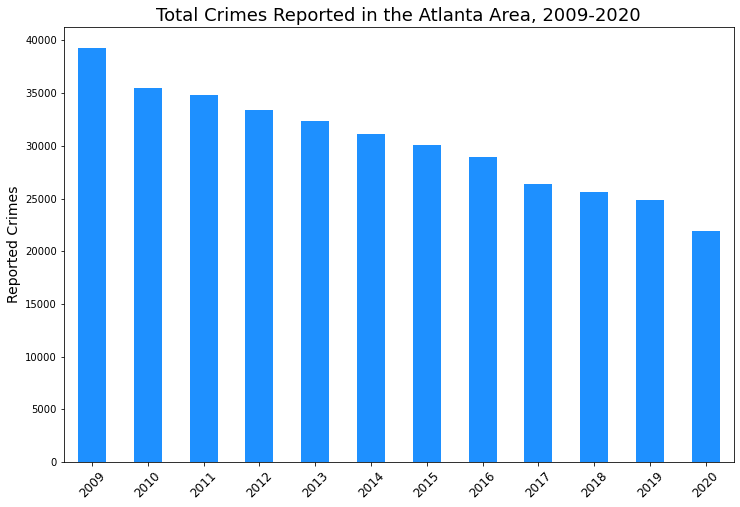

In [97]:
#Plot a bar chart of number of crimes by year
year_counts.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area, 2009-2020", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

    Year  Reported Crimes
9   2018            25606
10  2019            24842
11  2020            21901


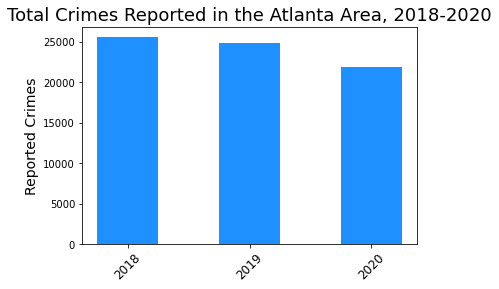

In [98]:
#Just pull 2018, 2019, 2020 for a more concentrated comparison
three_years = year_counts_df.loc[(year_counts_df["Year"]==2018) |(year_counts_df["Year"]==2019) | (year_counts_df["Year"]==2020)]
print(three_years)


#Set the chart type as bar, x-axis is the number of drug names, y is the number of treatments, set color and width of bars
plt.bar(three_years["Year"], three_years["Reported Crimes"], color = 'dodgerblue', align='center', width=0.5)

#Set placement of tick marks - just doing a pandas plot puts half year tick marks as well....
plt.xticks(three_years["Year"], rotation = 45, fontsize = (12))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area, 2018-2020", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()


In [103]:
#Group original dataframe by year and crime, count to show number of offenses for each type of crime
year_offense_group =crime_no_ibr_df.groupby(["occur_year", "UC2_Literal"])['offense_id'].count()
year_offense_group

occur_year  UC2_Literal         
2009        AGG ASSAULT             2589
            AUTO THEFT              5622
            BURGLARY-NONRES         1682
            BURGLARY-RESIDENCE      7393
            HOMICIDE                  77
                                    ... 
2020        HOMICIDE                 146
            LARCENY-FROM VEHICLE    8584
            LARCENY-NON VEHICLE     4628
            MANSLAUGHTER               2
            ROBBERY                  889
Name: offense_id, Length: 119, dtype: int64

In [104]:
#make year_offense into a dataframe and reset the index
year_offense_df = pd.DataFrame(year_offense_group).reset_index()

year_offense_df


,occur_year,UC2_Literal,offense_id
0,2009,AGG ASSAULT,2589
1,2009,AUTO THEFT,5622
2,2009,BURGLARY-NONRES,1682
3,2009,BURGLARY-RESIDENCE,7393
4,2009,HOMICIDE,77
...,...,...,...
114,2020,HOMICIDE,146
115,2020,LARCENY-FROM VEHICLE,8584
116,2020,LARCENY-NON VEHICLE,4628
117,2020,MANSLAUGHTER,2
